In [1]:
import sys
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV6
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH
import os

/home/gil/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')

h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, bulkiness_data, vdw_data, charge_index_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [3]:
encoder, autoencoder, sess = autoencoderV6(4)

../models/RNN_autoencoder6.py:45: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  merge_layer = L.merge([dense_1_vl, dense_1_vh], mode='concat', name='merge_layer')
/home/gil/anaconda3/lib/python3.6/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


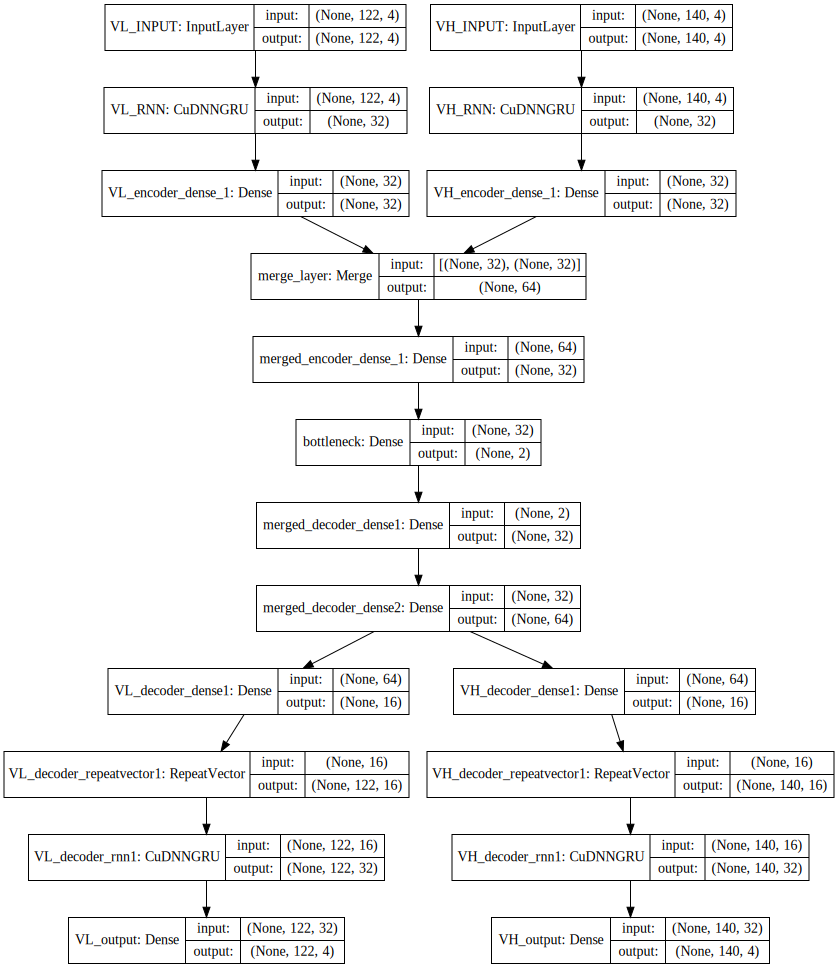

In [4]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

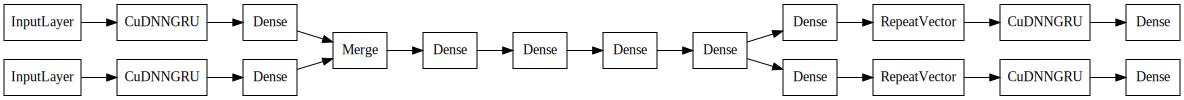

In [13]:
SVG(model_to_dot(autoencoder, rankdir='LR', show_layer_names=False).create(prog='dot', format='svg'))

In [15]:
model_to_dot(autoencoder, rankdir='LR', show_layer_names=False)

In [16]:
_.write_png('./autoencoderV6')

In [5]:
NAME= 'autoencoderV6'
RUN = 'run1'

weight_path = '../model_weights/{}/{}/{}_allfeatures.hdf5'.format(NAME,RUN,NAME)
log_path = '../logs/{}/{}'.format(NAME, RUN)

In [6]:
if not os.path.exists('../model_weights/{}/{}/'.format(NAME,RUN)):
    os.mkdir('../model_weights/{}'.format(NAME))
    os.mkdir('../model_weights/{}/{}'.format(NAME,RUN))

In [10]:
history = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], [VL_encoded_shuffled, VH_encoded_shuffled],
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint(weight_path, save_best_only=True),
                                     keras.callbacks.TensorBoard(log_path)])

Train on 1706 samples, validate on 427 samples
Epoch 1/2000
1706/1706 [==============================] - 2s 1ms/step - loss: 0.8665 - VL_output_loss: 0.4241 - VH_output_loss: 0.4424 - val_loss: 0.5273 - val_VL_output_loss: 0.2610 - val_VH_output_loss: 0.2663
Epoch 2/2000
1706/1706 [==============================] - 1s 689us/step - loss: 0.5236 - VL_output_loss: 0.2592 - VH_output_loss: 0.2644 - val_loss: 0.5231 - val_VL_output_loss: 0.2586 - val_VH_output_loss: 0.2645
Epoch 3/2000
1706/1706 [==============================] - 1s 725us/step - loss: 0.5203 - VL_output_loss: 0.2574 - VH_output_loss: 0.2628 - val_loss: 0.5205 - val_VL_output_loss: 0.2573 - val_VH_output_loss: 0.2633
Epoch 4/2000
1706/1706 [==============================] - 1s 714us/step - loss: 0.5181 - VL_output_loss: 0.2563 - VH_output_loss: 0.2618 - val_loss: 0.5186 - val_VL_output_loss: 0.2563 - val_VH_output_loss: 0.2623
Epoch 5/2000
1706/1706 [==============================] - 1s 689us/step - loss: 0.5164 - VL_output_

Epoch 39/2000
1706/1706 [==============================] - 1s 692us/step - loss: 0.4966 - VL_output_loss: 0.2492 - VH_output_loss: 0.2474 - val_loss: 0.4980 - val_VL_output_loss: 0.2494 - val_VH_output_loss: 0.2486
Epoch 40/2000
1706/1706 [==============================] - 1s 604us/step - loss: 0.4964 - VL_output_loss: 0.2491 - VH_output_loss: 0.2473 - val_loss: 0.4978 - val_VL_output_loss: 0.2493 - val_VH_output_loss: 0.2484
Epoch 41/2000
1706/1706 [==============================] - 1s 614us/step - loss: 0.4963 - VL_output_loss: 0.2490 - VH_output_loss: 0.2473 - val_loss: 0.4975 - val_VL_output_loss: 0.2492 - val_VH_output_loss: 0.2483
Epoch 42/2000
1706/1706 [==============================] - 1s 609us/step - loss: 0.4961 - VL_output_loss: 0.2489 - VH_output_loss: 0.2472 - val_loss: 0.4975 - val_VL_output_loss: 0.2491 - val_VH_output_loss: 0.2484
Epoch 43/2000
1706/1706 [==============================] - 1s 617us/step - loss: 0.4960 - VL_output_loss: 0.2488 - VH_output_loss: 0.2472 - 

1706/1706 [==============================] - 1s 634us/step - loss: 0.4492 - VL_output_loss: 0.2287 - VH_output_loss: 0.2205 - val_loss: 0.4478 - val_VL_output_loss: 0.2266 - val_VH_output_loss: 0.2212
Epoch 116/2000
1706/1706 [==============================] - 1s 651us/step - loss: 0.4476 - VL_output_loss: 0.2280 - VH_output_loss: 0.2197 - val_loss: 0.4472 - val_VL_output_loss: 0.2279 - val_VH_output_loss: 0.2193
Epoch 117/2000
1706/1706 [==============================] - 1s 647us/step - loss: 0.4475 - VL_output_loss: 0.2282 - VH_output_loss: 0.2193 - val_loss: 0.4469 - val_VL_output_loss: 0.2270 - val_VH_output_loss: 0.2199
Epoch 118/2000
1706/1706 [==============================] - 1s 688us/step - loss: 0.4469 - VL_output_loss: 0.2281 - VH_output_loss: 0.2188 - val_loss: 0.4442 - val_VL_output_loss: 0.2259 - val_VH_output_loss: 0.2183
Epoch 119/2000
1706/1706 [==============================] - 1s 635us/step - loss: 0.4457 - VL_output_loss: 0.2275 - VH_output_loss: 0.2183 - val_loss: 

Epoch 153/2000
1706/1706 [==============================] - 1s 651us/step - loss: 0.4220 - VL_output_loss: 0.2110 - VH_output_loss: 0.2110 - val_loss: 0.4200 - val_VL_output_loss: 0.2092 - val_VH_output_loss: 0.2108
Epoch 154/2000
1706/1706 [==============================] - 1s 674us/step - loss: 0.4217 - VL_output_loss: 0.2104 - VH_output_loss: 0.2113 - val_loss: 0.4190 - val_VL_output_loss: 0.2069 - val_VH_output_loss: 0.2121
Epoch 155/2000
1706/1706 [==============================] - 1s 615us/step - loss: 0.4201 - VL_output_loss: 0.2090 - VH_output_loss: 0.2111 - val_loss: 0.4159 - val_VL_output_loss: 0.2055 - val_VH_output_loss: 0.2104
Epoch 156/2000
1706/1706 [==============================] - 1s 608us/step - loss: 0.4190 - VL_output_loss: 0.2085 - VH_output_loss: 0.2105 - val_loss: 0.4163 - val_VL_output_loss: 0.2057 - val_VH_output_loss: 0.2106
Epoch 157/2000
1706/1706 [==============================] - 1s 757us/step - loss: 0.4178 - VL_output_loss: 0.2074 - VH_output_loss: 0.21

Epoch 191/2000
1706/1706 [==============================] - 1s 641us/step - loss: 0.3930 - VL_output_loss: 0.1883 - VH_output_loss: 0.2048 - val_loss: 0.3890 - val_VL_output_loss: 0.1840 - val_VH_output_loss: 0.2050
Epoch 192/2000
1706/1706 [==============================] - 1s 655us/step - loss: 0.3929 - VL_output_loss: 0.1880 - VH_output_loss: 0.2049 - val_loss: 0.4045 - val_VL_output_loss: 0.1995 - val_VH_output_loss: 0.2050
Epoch 193/2000
1706/1706 [==============================] - 1s 687us/step - loss: 0.3953 - VL_output_loss: 0.1905 - VH_output_loss: 0.2049 - val_loss: 0.3911 - val_VL_output_loss: 0.1847 - val_VH_output_loss: 0.2064
Epoch 194/2000
1706/1706 [==============================] - 1s 573us/step - loss: 0.3928 - VL_output_loss: 0.1879 - VH_output_loss: 0.2048 - val_loss: 0.3883 - val_VL_output_loss: 0.1811 - val_VH_output_loss: 0.2072
Epoch 195/2000
1706/1706 [==============================] - 1s 579us/step - loss: 0.3906 - VL_output_loss: 0.1861 - VH_output_loss: 0.20

Epoch 229/2000
1706/1706 [==============================] - 1s 568us/step - loss: 0.3757 - VL_output_loss: 0.1769 - VH_output_loss: 0.1988 - val_loss: 0.3699 - val_VL_output_loss: 0.1710 - val_VH_output_loss: 0.1988
Epoch 230/2000
1706/1706 [==============================] - 1s 573us/step - loss: 0.3772 - VL_output_loss: 0.1780 - VH_output_loss: 0.1992 - val_loss: 0.3794 - val_VL_output_loss: 0.1806 - val_VH_output_loss: 0.1987
Epoch 231/2000
1706/1706 [==============================] - 1s 573us/step - loss: 0.3781 - VL_output_loss: 0.1795 - VH_output_loss: 0.1985 - val_loss: 0.3749 - val_VL_output_loss: 0.1766 - val_VH_output_loss: 0.1983
Epoch 232/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.3757 - VL_output_loss: 0.1774 - VH_output_loss: 0.1983 - val_loss: 0.3721 - val_VL_output_loss: 0.1735 - val_VH_output_loss: 0.1987
Epoch 233/2000
1706/1706 [==============================] - 1s 575us/step - loss: 0.3753 - VL_output_loss: 0.1766 - VH_output_loss: 0.19

Epoch 267/2000
1706/1706 [==============================] - 1s 651us/step - loss: 0.3643 - VL_output_loss: 0.1696 - VH_output_loss: 0.1947 - val_loss: 0.3617 - val_VL_output_loss: 0.1660 - val_VH_output_loss: 0.1957
Epoch 268/2000
1706/1706 [==============================] - 1s 598us/step - loss: 0.3647 - VL_output_loss: 0.1700 - VH_output_loss: 0.1948 - val_loss: 0.3624 - val_VL_output_loss: 0.1675 - val_VH_output_loss: 0.1949
Epoch 269/2000
1706/1706 [==============================] - 1s 687us/step - loss: 0.3655 - VL_output_loss: 0.1706 - VH_output_loss: 0.1949 - val_loss: 0.3613 - val_VL_output_loss: 0.1663 - val_VH_output_loss: 0.1949
Epoch 270/2000
1706/1706 [==============================] - 1s 641us/step - loss: 0.3651 - VL_output_loss: 0.1705 - VH_output_loss: 0.1946 - val_loss: 0.3637 - val_VL_output_loss: 0.1693 - val_VH_output_loss: 0.1944
Epoch 271/2000
1706/1706 [==============================] - 1s 659us/step - loss: 0.3651 - VL_output_loss: 0.1705 - VH_output_loss: 0.19

Epoch 305/2000
1706/1706 [==============================] - 1s 667us/step - loss: 0.3579 - VL_output_loss: 0.1671 - VH_output_loss: 0.1909 - val_loss: 0.3552 - val_VL_output_loss: 0.1647 - val_VH_output_loss: 0.1906
Epoch 306/2000
1706/1706 [==============================] - 1s 592us/step - loss: 0.3578 - VL_output_loss: 0.1667 - VH_output_loss: 0.1911 - val_loss: 0.3513 - val_VL_output_loss: 0.1607 - val_VH_output_loss: 0.1906
Epoch 307/2000
1706/1706 [==============================] - 1s 661us/step - loss: 0.3595 - VL_output_loss: 0.1687 - VH_output_loss: 0.1908 - val_loss: 0.3565 - val_VL_output_loss: 0.1662 - val_VH_output_loss: 0.1904
Epoch 308/2000
1706/1706 [==============================] - 1s 668us/step - loss: 0.3588 - VL_output_loss: 0.1682 - VH_output_loss: 0.1906 - val_loss: 0.3504 - val_VL_output_loss: 0.1593 - val_VH_output_loss: 0.1911
Epoch 309/2000
1706/1706 [==============================] - 1s 634us/step - loss: 0.3572 - VL_output_loss: 0.1663 - VH_output_loss: 0.19

Epoch 343/2000
1706/1706 [==============================] - 1s 749us/step - loss: 0.3537 - VL_output_loss: 0.1669 - VH_output_loss: 0.1868 - val_loss: 0.3447 - val_VL_output_loss: 0.1575 - val_VH_output_loss: 0.1872
Epoch 344/2000
1706/1706 [==============================] - 1s 725us/step - loss: 0.3503 - VL_output_loss: 0.1635 - VH_output_loss: 0.1868 - val_loss: 0.3475 - val_VL_output_loss: 0.1602 - val_VH_output_loss: 0.1873
Epoch 345/2000
1706/1706 [==============================] - 1s 752us/step - loss: 0.3512 - VL_output_loss: 0.1640 - VH_output_loss: 0.1872 - val_loss: 0.3426 - val_VL_output_loss: 0.1558 - val_VH_output_loss: 0.1868
Epoch 346/2000
1706/1706 [==============================] - 1s 755us/step - loss: 0.3551 - VL_output_loss: 0.1655 - VH_output_loss: 0.1896 - val_loss: 0.3441 - val_VL_output_loss: 0.1562 - val_VH_output_loss: 0.1879
Epoch 347/2000
1706/1706 [==============================] - 1s 722us/step - loss: 0.3481 - VL_output_loss: 0.1618 - VH_output_loss: 0.18

Epoch 381/2000
1706/1706 [==============================] - 1s 600us/step - loss: 0.3490 - VL_output_loss: 0.1637 - VH_output_loss: 0.1853 - val_loss: 0.3406 - val_VL_output_loss: 0.1562 - val_VH_output_loss: 0.1844
Epoch 382/2000
1706/1706 [==============================] - 1s 604us/step - loss: 0.3440 - VL_output_loss: 0.1607 - VH_output_loss: 0.1833 - val_loss: 0.3404 - val_VL_output_loss: 0.1568 - val_VH_output_loss: 0.1836
Epoch 383/2000
1706/1706 [==============================] - 1s 576us/step - loss: 0.3424 - VL_output_loss: 0.1591 - VH_output_loss: 0.1834 - val_loss: 0.3412 - val_VL_output_loss: 0.1567 - val_VH_output_loss: 0.1845
Epoch 384/2000
1706/1706 [==============================] - 1s 575us/step - loss: 0.3446 - VL_output_loss: 0.1608 - VH_output_loss: 0.1838 - val_loss: 0.3374 - val_VL_output_loss: 0.1542 - val_VH_output_loss: 0.1832
Epoch 385/2000
1706/1706 [==============================] - 1s 577us/step - loss: 0.3514 - VL_output_loss: 0.1675 - VH_output_loss: 0.18

Epoch 419/2000
1706/1706 [==============================] - 1s 600us/step - loss: 0.3420 - VL_output_loss: 0.1600 - VH_output_loss: 0.1819 - val_loss: 0.3482 - val_VL_output_loss: 0.1532 - val_VH_output_loss: 0.1950
Epoch 420/2000
1706/1706 [==============================] - 1s 595us/step - loss: 0.3421 - VL_output_loss: 0.1594 - VH_output_loss: 0.1827 - val_loss: 0.3333 - val_VL_output_loss: 0.1514 - val_VH_output_loss: 0.1819
Epoch 421/2000
1706/1706 [==============================] - 1s 603us/step - loss: 0.3382 - VL_output_loss: 0.1565 - VH_output_loss: 0.1817 - val_loss: 0.3346 - val_VL_output_loss: 0.1520 - val_VH_output_loss: 0.1826
Epoch 422/2000
1706/1706 [==============================] - 1s 602us/step - loss: 0.3385 - VL_output_loss: 0.1564 - VH_output_loss: 0.1821 - val_loss: 0.3435 - val_VL_output_loss: 0.1597 - val_VH_output_loss: 0.1838
Epoch 423/2000
1706/1706 [==============================] - 1s 620us/step - loss: 0.3407 - VL_output_loss: 0.1589 - VH_output_loss: 0.18

Epoch 457/2000
1706/1706 [==============================] - 1s 594us/step - loss: 0.3394 - VL_output_loss: 0.1576 - VH_output_loss: 0.1818 - val_loss: 0.3336 - val_VL_output_loss: 0.1521 - val_VH_output_loss: 0.1815
Epoch 458/2000
1706/1706 [==============================] - 1s 566us/step - loss: 0.3374 - VL_output_loss: 0.1564 - VH_output_loss: 0.1809 - val_loss: 0.3340 - val_VL_output_loss: 0.1531 - val_VH_output_loss: 0.1809
Epoch 459/2000
1706/1706 [==============================] - 1s 608us/step - loss: 0.3379 - VL_output_loss: 0.1579 - VH_output_loss: 0.1800 - val_loss: 0.3514 - val_VL_output_loss: 0.1707 - val_VH_output_loss: 0.1807
Epoch 460/2000
1706/1706 [==============================] - 1s 576us/step - loss: 0.3371 - VL_output_loss: 0.1569 - VH_output_loss: 0.1802 - val_loss: 0.3329 - val_VL_output_loss: 0.1520 - val_VH_output_loss: 0.1809
Epoch 461/2000
1706/1706 [==============================] - 1s 588us/step - loss: 0.3372 - VL_output_loss: 0.1574 - VH_output_loss: 0.17

Epoch 495/2000
1706/1706 [==============================] - 1s 593us/step - loss: 0.3352 - VL_output_loss: 0.1558 - VH_output_loss: 0.1794 - val_loss: 0.3282 - val_VL_output_loss: 0.1483 - val_VH_output_loss: 0.1799
Epoch 496/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.3321 - VL_output_loss: 0.1527 - VH_output_loss: 0.1794 - val_loss: 0.3315 - val_VL_output_loss: 0.1515 - val_VH_output_loss: 0.1800
Epoch 497/2000
1706/1706 [==============================] - 1s 581us/step - loss: 0.3311 - VL_output_loss: 0.1514 - VH_output_loss: 0.1797 - val_loss: 0.3282 - val_VL_output_loss: 0.1477 - val_VH_output_loss: 0.1804
Epoch 498/2000
1706/1706 [==============================] - 1s 590us/step - loss: 0.3308 - VL_output_loss: 0.1510 - VH_output_loss: 0.1798 - val_loss: 0.3445 - val_VL_output_loss: 0.1649 - val_VH_output_loss: 0.1796
Epoch 499/2000
1706/1706 [==============================] - 1s 588us/step - loss: 0.3341 - VL_output_loss: 0.1549 - VH_output_loss: 0.17

Epoch 533/2000
1706/1706 [==============================] - 1s 615us/step - loss: 0.3276 - VL_output_loss: 0.1506 - VH_output_loss: 0.1770 - val_loss: 0.3269 - val_VL_output_loss: 0.1487 - val_VH_output_loss: 0.1782
Epoch 534/2000
1706/1706 [==============================] - 1s 597us/step - loss: 0.3280 - VL_output_loss: 0.1504 - VH_output_loss: 0.1776 - val_loss: 0.3244 - val_VL_output_loss: 0.1460 - val_VH_output_loss: 0.1784
Epoch 535/2000
1706/1706 [==============================] - 1s 641us/step - loss: 0.3265 - VL_output_loss: 0.1489 - VH_output_loss: 0.1776 - val_loss: 0.3258 - val_VL_output_loss: 0.1485 - val_VH_output_loss: 0.1773
Epoch 536/2000
1706/1706 [==============================] - 1s 617us/step - loss: 0.3281 - VL_output_loss: 0.1505 - VH_output_loss: 0.1776 - val_loss: 0.3283 - val_VL_output_loss: 0.1478 - val_VH_output_loss: 0.1805
Epoch 537/2000
1706/1706 [==============================] - 1s 651us/step - loss: 0.3264 - VL_output_loss: 0.1495 - VH_output_loss: 0.17

Epoch 571/2000
1706/1706 [==============================] - 1s 614us/step - loss: 0.3235 - VL_output_loss: 0.1461 - VH_output_loss: 0.1773 - val_loss: 0.3199 - val_VL_output_loss: 0.1434 - val_VH_output_loss: 0.1766
Epoch 572/2000
1706/1706 [==============================] - 1s 648us/step - loss: 0.3209 - VL_output_loss: 0.1448 - VH_output_loss: 0.1761 - val_loss: 0.3215 - val_VL_output_loss: 0.1448 - val_VH_output_loss: 0.1767
Epoch 573/2000
1706/1706 [==============================] - 1s 630us/step - loss: 0.3222 - VL_output_loss: 0.1462 - VH_output_loss: 0.1761 - val_loss: 0.3222 - val_VL_output_loss: 0.1456 - val_VH_output_loss: 0.1766
Epoch 574/2000
1706/1706 [==============================] - 1s 617us/step - loss: 0.3229 - VL_output_loss: 0.1463 - VH_output_loss: 0.1766 - val_loss: 0.3218 - val_VL_output_loss: 0.1448 - val_VH_output_loss: 0.1770
Epoch 575/2000
1706/1706 [==============================] - 1s 679us/step - loss: 0.3215 - VL_output_loss: 0.1457 - VH_output_loss: 0.17

Epoch 609/2000
1706/1706 [==============================] - 1s 628us/step - loss: 0.3243 - VL_output_loss: 0.1482 - VH_output_loss: 0.1761 - val_loss: 0.3193 - val_VL_output_loss: 0.1426 - val_VH_output_loss: 0.1766
Epoch 610/2000
1706/1706 [==============================] - 1s 600us/step - loss: 0.3235 - VL_output_loss: 0.1481 - VH_output_loss: 0.1754 - val_loss: 0.3206 - val_VL_output_loss: 0.1441 - val_VH_output_loss: 0.1765
Epoch 611/2000
1706/1706 [==============================] - 1s 625us/step - loss: 0.3226 - VL_output_loss: 0.1459 - VH_output_loss: 0.1767 - val_loss: 0.3214 - val_VL_output_loss: 0.1436 - val_VH_output_loss: 0.1778
Epoch 612/2000
1706/1706 [==============================] - 1s 594us/step - loss: 0.3257 - VL_output_loss: 0.1500 - VH_output_loss: 0.1757 - val_loss: 0.3264 - val_VL_output_loss: 0.1504 - val_VH_output_loss: 0.1760
Epoch 613/2000
1706/1706 [==============================] - 1s 612us/step - loss: 0.3243 - VL_output_loss: 0.1483 - VH_output_loss: 0.17

Epoch 647/2000
1706/1706 [==============================] - 1s 601us/step - loss: 0.3176 - VL_output_loss: 0.1441 - VH_output_loss: 0.1736 - val_loss: 0.3159 - val_VL_output_loss: 0.1422 - val_VH_output_loss: 0.1737
Epoch 648/2000
1706/1706 [==============================] - 1s 578us/step - loss: 0.3202 - VL_output_loss: 0.1460 - VH_output_loss: 0.1742 - val_loss: 0.3197 - val_VL_output_loss: 0.1452 - val_VH_output_loss: 0.1745
Epoch 649/2000
1706/1706 [==============================] - 1s 588us/step - loss: 0.3174 - VL_output_loss: 0.1432 - VH_output_loss: 0.1741 - val_loss: 0.3190 - val_VL_output_loss: 0.1449 - val_VH_output_loss: 0.1742
Epoch 650/2000
1706/1706 [==============================] - 1s 575us/step - loss: 0.3162 - VL_output_loss: 0.1424 - VH_output_loss: 0.1739 - val_loss: 0.3169 - val_VL_output_loss: 0.1429 - val_VH_output_loss: 0.1740
Epoch 651/2000
1706/1706 [==============================] - 1s 594us/step - loss: 0.3178 - VL_output_loss: 0.1438 - VH_output_loss: 0.17

Epoch 722/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.3193 - VL_output_loss: 0.1478 - VH_output_loss: 0.1715 - val_loss: 0.3212 - val_VL_output_loss: 0.1481 - val_VH_output_loss: 0.1731
Epoch 723/2000
1706/1706 [==============================] - 1s 594us/step - loss: 0.3147 - VL_output_loss: 0.1427 - VH_output_loss: 0.1720 - val_loss: 0.3135 - val_VL_output_loss: 0.1399 - val_VH_output_loss: 0.1735
Epoch 724/2000
1706/1706 [==============================] - 1s 595us/step - loss: 0.3138 - VL_output_loss: 0.1425 - VH_output_loss: 0.1713 - val_loss: 0.3173 - val_VL_output_loss: 0.1440 - val_VH_output_loss: 0.1733
Epoch 725/2000
1706/1706 [==============================] - 1s 600us/step - loss: 0.3225 - VL_output_loss: 0.1489 - VH_output_loss: 0.1736 - val_loss: 0.3168 - val_VL_output_loss: 0.1418 - val_VH_output_loss: 0.1750
Epoch 726/2000
1706/1706 [==============================] - 1s 584us/step - loss: 0.3131 - VL_output_loss: 0.1420 - VH_output_loss: 0.17

Epoch 760/2000
1706/1706 [==============================] - 1s 596us/step - loss: 0.3160 - VL_output_loss: 0.1443 - VH_output_loss: 0.1718 - val_loss: 0.3140 - val_VL_output_loss: 0.1425 - val_VH_output_loss: 0.1715
Epoch 761/2000
1706/1706 [==============================] - 1s 577us/step - loss: 0.3148 - VL_output_loss: 0.1440 - VH_output_loss: 0.1708 - val_loss: 0.3179 - val_VL_output_loss: 0.1446 - val_VH_output_loss: 0.1733
Epoch 762/2000
1706/1706 [==============================] - 1s 599us/step - loss: 0.3129 - VL_output_loss: 0.1418 - VH_output_loss: 0.1711 - val_loss: 0.3115 - val_VL_output_loss: 0.1398 - val_VH_output_loss: 0.1717
Epoch 763/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.3100 - VL_output_loss: 0.1395 - VH_output_loss: 0.1705 - val_loss: 0.3199 - val_VL_output_loss: 0.1477 - val_VH_output_loss: 0.1722
Epoch 764/2000
1706/1706 [==============================] - 1s 573us/step - loss: 0.3105 - VL_output_loss: 0.1395 - VH_output_loss: 0.17

Epoch 798/2000
1706/1706 [==============================] - 1s 588us/step - loss: 0.3117 - VL_output_loss: 0.1397 - VH_output_loss: 0.1720 - val_loss: 0.3095 - val_VL_output_loss: 0.1381 - val_VH_output_loss: 0.1714
Epoch 799/2000
1706/1706 [==============================] - 1s 570us/step - loss: 0.3104 - VL_output_loss: 0.1406 - VH_output_loss: 0.1698 - val_loss: 0.3110 - val_VL_output_loss: 0.1385 - val_VH_output_loss: 0.1725
Epoch 800/2000
1706/1706 [==============================] - 1s 589us/step - loss: 0.3082 - VL_output_loss: 0.1397 - VH_output_loss: 0.1685 - val_loss: 0.3144 - val_VL_output_loss: 0.1415 - val_VH_output_loss: 0.1729
Epoch 801/2000
1706/1706 [==============================] - 1s 604us/step - loss: 0.3116 - VL_output_loss: 0.1408 - VH_output_loss: 0.1707 - val_loss: 0.3096 - val_VL_output_loss: 0.1388 - val_VH_output_loss: 0.1707
Epoch 802/2000
1706/1706 [==============================] - 1s 573us/step - loss: 0.3076 - VL_output_loss: 0.1388 - VH_output_loss: 0.16

Epoch 836/2000
1706/1706 [==============================] - 1s 598us/step - loss: 0.3053 - VL_output_loss: 0.1372 - VH_output_loss: 0.1681 - val_loss: 0.3145 - val_VL_output_loss: 0.1416 - val_VH_output_loss: 0.1728
Epoch 837/2000
1706/1706 [==============================] - 1s 615us/step - loss: 0.3057 - VL_output_loss: 0.1376 - VH_output_loss: 0.1681 - val_loss: 0.3106 - val_VL_output_loss: 0.1388 - val_VH_output_loss: 0.1718
Epoch 838/2000
1706/1706 [==============================] - 1s 769us/step - loss: 0.3056 - VL_output_loss: 0.1381 - VH_output_loss: 0.1675 - val_loss: 0.3094 - val_VL_output_loss: 0.1400 - val_VH_output_loss: 0.1694
Epoch 839/2000
1706/1706 [==============================] - 1s 737us/step - loss: 0.3031 - VL_output_loss: 0.1358 - VH_output_loss: 0.1673 - val_loss: 0.3091 - val_VL_output_loss: 0.1377 - val_VH_output_loss: 0.1714
Epoch 840/2000
1706/1706 [==============================] - 1s 668us/step - loss: 0.3067 - VL_output_loss: 0.1391 - VH_output_loss: 0.16

Epoch 874/2000
1706/1706 [==============================] - 1s 585us/step - loss: 0.3054 - VL_output_loss: 0.1360 - VH_output_loss: 0.1694 - val_loss: 0.3093 - val_VL_output_loss: 0.1367 - val_VH_output_loss: 0.1726
Epoch 875/2000
1706/1706 [==============================] - 1s 652us/step - loss: 0.3052 - VL_output_loss: 0.1388 - VH_output_loss: 0.1663 - val_loss: 0.3071 - val_VL_output_loss: 0.1381 - val_VH_output_loss: 0.1689
Epoch 876/2000
1706/1706 [==============================] - 1s 601us/step - loss: 0.3037 - VL_output_loss: 0.1370 - VH_output_loss: 0.1667 - val_loss: 0.3090 - val_VL_output_loss: 0.1409 - val_VH_output_loss: 0.1681
Epoch 877/2000
1706/1706 [==============================] - 1s 582us/step - loss: 0.3039 - VL_output_loss: 0.1368 - VH_output_loss: 0.1671 - val_loss: 0.3057 - val_VL_output_loss: 0.1370 - val_VH_output_loss: 0.1687
Epoch 878/2000
1706/1706 [==============================] - 1s 603us/step - loss: 0.3040 - VL_output_loss: 0.1365 - VH_output_loss: 0.16

Epoch 912/2000
1706/1706 [==============================] - 1s 579us/step - loss: 0.3032 - VL_output_loss: 0.1376 - VH_output_loss: 0.1656 - val_loss: 0.3061 - val_VL_output_loss: 0.1388 - val_VH_output_loss: 0.1673
Epoch 913/2000
1706/1706 [==============================] - 1s 572us/step - loss: 0.3001 - VL_output_loss: 0.1352 - VH_output_loss: 0.1649 - val_loss: 0.3068 - val_VL_output_loss: 0.1371 - val_VH_output_loss: 0.1696
Epoch 914/2000
1706/1706 [==============================] - 1s 572us/step - loss: 0.3005 - VL_output_loss: 0.1348 - VH_output_loss: 0.1657 - val_loss: 0.3062 - val_VL_output_loss: 0.1359 - val_VH_output_loss: 0.1703
Epoch 915/2000
1706/1706 [==============================] - 1s 597us/step - loss: 0.3029 - VL_output_loss: 0.1359 - VH_output_loss: 0.1670 - val_loss: 0.3086 - val_VL_output_loss: 0.1377 - val_VH_output_loss: 0.1709
Epoch 916/2000
1706/1706 [==============================] - 1s 592us/step - loss: 0.3034 - VL_output_loss: 0.1375 - VH_output_loss: 0.16

Epoch 950/2000
1706/1706 [==============================] - 1s 626us/step - loss: 0.2998 - VL_output_loss: 0.1343 - VH_output_loss: 0.1655 - val_loss: 0.3037 - val_VL_output_loss: 0.1340 - val_VH_output_loss: 0.1697
Epoch 951/2000
1706/1706 [==============================] - 1s 609us/step - loss: 0.3003 - VL_output_loss: 0.1346 - VH_output_loss: 0.1656 - val_loss: 0.3043 - val_VL_output_loss: 0.1356 - val_VH_output_loss: 0.1688
Epoch 952/2000
1706/1706 [==============================] - 1s 751us/step - loss: 0.2978 - VL_output_loss: 0.1335 - VH_output_loss: 0.1643 - val_loss: 0.3032 - val_VL_output_loss: 0.1352 - val_VH_output_loss: 0.1680
Epoch 953/2000
1706/1706 [==============================] - 1s 734us/step - loss: 0.2970 - VL_output_loss: 0.1328 - VH_output_loss: 0.1643 - val_loss: 0.3005 - val_VL_output_loss: 0.1345 - val_VH_output_loss: 0.1660
Epoch 954/2000
1706/1706 [==============================] - 1s 772us/step - loss: 0.2981 - VL_output_loss: 0.1331 - VH_output_loss: 0.16

Epoch 988/2000
1706/1706 [==============================] - 1s 659us/step - loss: 0.3006 - VL_output_loss: 0.1347 - VH_output_loss: 0.1659 - val_loss: 0.3018 - val_VL_output_loss: 0.1338 - val_VH_output_loss: 0.1680
Epoch 989/2000
1706/1706 [==============================] - 1s 637us/step - loss: 0.2967 - VL_output_loss: 0.1325 - VH_output_loss: 0.1642 - val_loss: 0.3044 - val_VL_output_loss: 0.1369 - val_VH_output_loss: 0.1675
Epoch 990/2000
1706/1706 [==============================] - 1s 622us/step - loss: 0.2964 - VL_output_loss: 0.1324 - VH_output_loss: 0.1641 - val_loss: 0.3025 - val_VL_output_loss: 0.1337 - val_VH_output_loss: 0.1689
Epoch 991/2000
1706/1706 [==============================] - 1s 579us/step - loss: 0.2949 - VL_output_loss: 0.1306 - VH_output_loss: 0.1643 - val_loss: 0.3053 - val_VL_output_loss: 0.1360 - val_VH_output_loss: 0.1692
Epoch 992/2000
1706/1706 [==============================] - 1s 633us/step - loss: 0.2956 - VL_output_loss: 0.1317 - VH_output_loss: 0.16

Epoch 1026/2000
1706/1706 [==============================] - 1s 667us/step - loss: 0.3133 - VL_output_loss: 0.1491 - VH_output_loss: 0.1642 - val_loss: 0.3110 - val_VL_output_loss: 0.1443 - val_VH_output_loss: 0.1667
Epoch 1027/2000
1706/1706 [==============================] - 1s 615us/step - loss: 0.3024 - VL_output_loss: 0.1383 - VH_output_loss: 0.1642 - val_loss: 0.3057 - val_VL_output_loss: 0.1391 - val_VH_output_loss: 0.1665
Epoch 1028/2000
1706/1706 [==============================] - 1s 622us/step - loss: 0.2997 - VL_output_loss: 0.1366 - VH_output_loss: 0.1631 - val_loss: 0.3000 - val_VL_output_loss: 0.1328 - val_VH_output_loss: 0.1673
Epoch 1029/2000
1706/1706 [==============================] - 1s 635us/step - loss: 0.2971 - VL_output_loss: 0.1339 - VH_output_loss: 0.1632 - val_loss: 0.3016 - val_VL_output_loss: 0.1356 - val_VH_output_loss: 0.1660
Epoch 1030/2000
1706/1706 [==============================] - 1s 584us/step - loss: 0.2957 - VL_output_loss: 0.1316 - VH_output_loss:

Epoch 1064/2000
1706/1706 [==============================] - 1s 602us/step - loss: 0.2962 - VL_output_loss: 0.1328 - VH_output_loss: 0.1634 - val_loss: 0.3010 - val_VL_output_loss: 0.1335 - val_VH_output_loss: 0.1675
Epoch 1065/2000
1706/1706 [==============================] - 1s 571us/step - loss: 0.2947 - VL_output_loss: 0.1311 - VH_output_loss: 0.1636 - val_loss: 0.3041 - val_VL_output_loss: 0.1348 - val_VH_output_loss: 0.1693
Epoch 1066/2000
1706/1706 [==============================] - 1s 578us/step - loss: 0.2951 - VL_output_loss: 0.1318 - VH_output_loss: 0.1632 - val_loss: 0.2977 - val_VL_output_loss: 0.1314 - val_VH_output_loss: 0.1663
Epoch 1067/2000
1706/1706 [==============================] - 1s 594us/step - loss: 0.2935 - VL_output_loss: 0.1301 - VH_output_loss: 0.1634 - val_loss: 0.2975 - val_VL_output_loss: 0.1318 - val_VH_output_loss: 0.1657
Epoch 1068/2000
1706/1706 [==============================] - 1s 572us/step - loss: 0.2938 - VL_output_loss: 0.1298 - VH_output_loss:

Epoch 1102/2000
1706/1706 [==============================] - 1s 590us/step - loss: 0.2941 - VL_output_loss: 0.1319 - VH_output_loss: 0.1622 - val_loss: 0.3005 - val_VL_output_loss: 0.1332 - val_VH_output_loss: 0.1673
Epoch 1103/2000
1706/1706 [==============================] - 1s 581us/step - loss: 0.2948 - VL_output_loss: 0.1330 - VH_output_loss: 0.1618 - val_loss: 0.2951 - val_VL_output_loss: 0.1311 - val_VH_output_loss: 0.1641
Epoch 1104/2000
1706/1706 [==============================] - 1s 582us/step - loss: 0.2930 - VL_output_loss: 0.1307 - VH_output_loss: 0.1623 - val_loss: 0.3005 - val_VL_output_loss: 0.1334 - val_VH_output_loss: 0.1671
Epoch 1105/2000
1706/1706 [==============================] - 1s 579us/step - loss: 0.2902 - VL_output_loss: 0.1286 - VH_output_loss: 0.1616 - val_loss: 0.2954 - val_VL_output_loss: 0.1301 - val_VH_output_loss: 0.1653
Epoch 1106/2000
1706/1706 [==============================] - 1s 565us/step - loss: 0.2934 - VL_output_loss: 0.1314 - VH_output_loss:

Epoch 1177/2000
1706/1706 [==============================] - 1s 600us/step - loss: 0.2912 - VL_output_loss: 0.1312 - VH_output_loss: 0.1601 - val_loss: 0.2977 - val_VL_output_loss: 0.1329 - val_VH_output_loss: 0.1647
Epoch 1178/2000
1706/1706 [==============================] - 1s 598us/step - loss: 0.2898 - VL_output_loss: 0.1288 - VH_output_loss: 0.1610 - val_loss: 0.2947 - val_VL_output_loss: 0.1303 - val_VH_output_loss: 0.1644
Epoch 1179/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.2898 - VL_output_loss: 0.1287 - VH_output_loss: 0.1610 - val_loss: 0.2945 - val_VL_output_loss: 0.1295 - val_VH_output_loss: 0.1650
Epoch 1180/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.2900 - VL_output_loss: 0.1282 - VH_output_loss: 0.1618 - val_loss: 0.2956 - val_VL_output_loss: 0.1314 - val_VH_output_loss: 0.1642
Epoch 1181/2000
1706/1706 [==============================] - 1s 577us/step - loss: 0.2890 - VL_output_loss: 0.1284 - VH_output_loss:

Epoch 1215/2000
1706/1706 [==============================] - 1s 592us/step - loss: 0.2911 - VL_output_loss: 0.1311 - VH_output_loss: 0.1601 - val_loss: 0.2971 - val_VL_output_loss: 0.1320 - val_VH_output_loss: 0.1651
Epoch 1216/2000
1706/1706 [==============================] - 1s 757us/step - loss: 0.2953 - VL_output_loss: 0.1353 - VH_output_loss: 0.1600 - val_loss: 0.3022 - val_VL_output_loss: 0.1369 - val_VH_output_loss: 0.1653
Epoch 1217/2000
1706/1706 [==============================] - 1s 628us/step - loss: 0.2945 - VL_output_loss: 0.1345 - VH_output_loss: 0.1600 - val_loss: 0.3028 - val_VL_output_loss: 0.1372 - val_VH_output_loss: 0.1656
Epoch 1218/2000
1706/1706 [==============================] - 1s 595us/step - loss: 0.2939 - VL_output_loss: 0.1333 - VH_output_loss: 0.1606 - val_loss: 0.2960 - val_VL_output_loss: 0.1304 - val_VH_output_loss: 0.1656
Epoch 1219/2000
1706/1706 [==============================] - 1s 609us/step - loss: 0.2879 - VL_output_loss: 0.1283 - VH_output_loss:

Epoch 1253/2000
1706/1706 [==============================] - 1s 590us/step - loss: 0.2862 - VL_output_loss: 0.1266 - VH_output_loss: 0.1596 - val_loss: 0.2974 - val_VL_output_loss: 0.1324 - val_VH_output_loss: 0.1650
Epoch 1254/2000
1706/1706 [==============================] - 1s 603us/step - loss: 0.2878 - VL_output_loss: 0.1276 - VH_output_loss: 0.1602 - val_loss: 0.2927 - val_VL_output_loss: 0.1288 - val_VH_output_loss: 0.1639
Epoch 1255/2000
1706/1706 [==============================] - 1s 584us/step - loss: 0.2860 - VL_output_loss: 0.1258 - VH_output_loss: 0.1602 - val_loss: 0.2979 - val_VL_output_loss: 0.1325 - val_VH_output_loss: 0.1654
Epoch 1256/2000
1706/1706 [==============================] - 1s 597us/step - loss: 0.2867 - VL_output_loss: 0.1264 - VH_output_loss: 0.1603 - val_loss: 0.2954 - val_VL_output_loss: 0.1300 - val_VH_output_loss: 0.1655
Epoch 1257/2000
1706/1706 [==============================] - 1s 609us/step - loss: 0.2861 - VL_output_loss: 0.1266 - VH_output_loss:

Epoch 1291/2000
1706/1706 [==============================] - 1s 775us/step - loss: 0.2871 - VL_output_loss: 0.1275 - VH_output_loss: 0.1596 - val_loss: 0.2965 - val_VL_output_loss: 0.1312 - val_VH_output_loss: 0.1652
Epoch 1292/2000
1706/1706 [==============================] - 1s 779us/step - loss: 0.2847 - VL_output_loss: 0.1260 - VH_output_loss: 0.1587 - val_loss: 0.2906 - val_VL_output_loss: 0.1277 - val_VH_output_loss: 0.1629
Epoch 1293/2000
1706/1706 [==============================] - 1s 759us/step - loss: 0.2872 - VL_output_loss: 0.1272 - VH_output_loss: 0.1600 - val_loss: 0.2938 - val_VL_output_loss: 0.1291 - val_VH_output_loss: 0.1647
Epoch 1294/2000
1706/1706 [==============================] - 1s 725us/step - loss: 0.2868 - VL_output_loss: 0.1273 - VH_output_loss: 0.1595 - val_loss: 0.2915 - val_VL_output_loss: 0.1290 - val_VH_output_loss: 0.1625
Epoch 1295/2000
1706/1706 [==============================] - 1s 756us/step - loss: 0.2864 - VL_output_loss: 0.1273 - VH_output_loss:

Epoch 1329/2000
1706/1706 [==============================] - 1s 593us/step - loss: 0.2843 - VL_output_loss: 0.1270 - VH_output_loss: 0.1573 - val_loss: 0.2900 - val_VL_output_loss: 0.1272 - val_VH_output_loss: 0.1628
Epoch 1330/2000
1706/1706 [==============================] - 1s 619us/step - loss: 0.2831 - VL_output_loss: 0.1258 - VH_output_loss: 0.1573 - val_loss: 0.2915 - val_VL_output_loss: 0.1269 - val_VH_output_loss: 0.1646
Epoch 1331/2000
1706/1706 [==============================] - 1s 620us/step - loss: 0.2842 - VL_output_loss: 0.1252 - VH_output_loss: 0.1590 - val_loss: 0.2919 - val_VL_output_loss: 0.1271 - val_VH_output_loss: 0.1649
Epoch 1332/2000
1706/1706 [==============================] - 1s 687us/step - loss: 0.2833 - VL_output_loss: 0.1253 - VH_output_loss: 0.1579 - val_loss: 0.2900 - val_VL_output_loss: 0.1267 - val_VH_output_loss: 0.1633
Epoch 1333/2000
1706/1706 [==============================] - 1s 764us/step - loss: 0.2852 - VL_output_loss: 0.1272 - VH_output_loss:

Epoch 1367/2000
1706/1706 [==============================] - 1s 594us/step - loss: 0.2838 - VL_output_loss: 0.1262 - VH_output_loss: 0.1576 - val_loss: 0.2962 - val_VL_output_loss: 0.1336 - val_VH_output_loss: 0.1627
Epoch 1368/2000
1706/1706 [==============================] - 1s 597us/step - loss: 0.2925 - VL_output_loss: 0.1347 - VH_output_loss: 0.1577 - val_loss: 0.3070 - val_VL_output_loss: 0.1443 - val_VH_output_loss: 0.1628
Epoch 1369/2000
1706/1706 [==============================] - 1s 597us/step - loss: 0.2856 - VL_output_loss: 0.1277 - VH_output_loss: 0.1579 - val_loss: 0.2905 - val_VL_output_loss: 0.1267 - val_VH_output_loss: 0.1639
Epoch 1370/2000
1706/1706 [==============================] - 1s 597us/step - loss: 0.2858 - VL_output_loss: 0.1281 - VH_output_loss: 0.1577 - val_loss: 0.2936 - val_VL_output_loss: 0.1305 - val_VH_output_loss: 0.1631
Epoch 1371/2000
1706/1706 [==============================] - 1s 600us/step - loss: 0.2918 - VL_output_loss: 0.1333 - VH_output_loss:

Epoch 1405/2000
1706/1706 [==============================] - 1s 588us/step - loss: 0.2856 - VL_output_loss: 0.1293 - VH_output_loss: 0.1564 - val_loss: 0.2948 - val_VL_output_loss: 0.1336 - val_VH_output_loss: 0.1613
Epoch 1406/2000
1706/1706 [==============================] - 1s 588us/step - loss: 0.2870 - VL_output_loss: 0.1294 - VH_output_loss: 0.1576 - val_loss: 0.2968 - val_VL_output_loss: 0.1330 - val_VH_output_loss: 0.1638
Epoch 1407/2000
1706/1706 [==============================] - 1s 578us/step - loss: 0.2900 - VL_output_loss: 0.1329 - VH_output_loss: 0.1571 - val_loss: 0.2938 - val_VL_output_loss: 0.1320 - val_VH_output_loss: 0.1618
Epoch 1408/2000
1706/1706 [==============================] - 1s 748us/step - loss: 0.2854 - VL_output_loss: 0.1284 - VH_output_loss: 0.1571 - val_loss: 0.2960 - val_VL_output_loss: 0.1319 - val_VH_output_loss: 0.1641
Epoch 1409/2000
1706/1706 [==============================] - 1s 621us/step - loss: 0.2892 - VL_output_loss: 0.1302 - VH_output_loss:

Epoch 1443/2000
1706/1706 [==============================] - 1s 582us/step - loss: 0.2879 - VL_output_loss: 0.1289 - VH_output_loss: 0.1590 - val_loss: 0.2910 - val_VL_output_loss: 0.1291 - val_VH_output_loss: 0.1619
Epoch 1444/2000
1706/1706 [==============================] - 1s 585us/step - loss: 0.2833 - VL_output_loss: 0.1269 - VH_output_loss: 0.1564 - val_loss: 0.2944 - val_VL_output_loss: 0.1298 - val_VH_output_loss: 0.1646
Epoch 1445/2000
1706/1706 [==============================] - 1s 712us/step - loss: 0.2822 - VL_output_loss: 0.1256 - VH_output_loss: 0.1566 - val_loss: 0.2930 - val_VL_output_loss: 0.1296 - val_VH_output_loss: 0.1634
Epoch 1446/2000
1706/1706 [==============================] - 1s 693us/step - loss: 0.2826 - VL_output_loss: 0.1256 - VH_output_loss: 0.1570 - val_loss: 0.2881 - val_VL_output_loss: 0.1274 - val_VH_output_loss: 0.1607
Epoch 1447/2000
1706/1706 [==============================] - 1s 796us/step - loss: 0.2831 - VL_output_loss: 0.1245 - VH_output_loss:

Epoch 1481/2000
1706/1706 [==============================] - 1s 757us/step - loss: 0.3004 - VL_output_loss: 0.1422 - VH_output_loss: 0.1582 - val_loss: 0.2997 - val_VL_output_loss: 0.1384 - val_VH_output_loss: 0.1614
Epoch 1482/2000
1706/1706 [==============================] - 1s 786us/step - loss: 0.3026 - VL_output_loss: 0.1441 - VH_output_loss: 0.1585 - val_loss: 0.3011 - val_VL_output_loss: 0.1379 - val_VH_output_loss: 0.1632
Epoch 1483/2000
1706/1706 [==============================] - 1s 769us/step - loss: 0.3017 - VL_output_loss: 0.1423 - VH_output_loss: 0.1594 - val_loss: 0.3019 - val_VL_output_loss: 0.1386 - val_VH_output_loss: 0.1633
Epoch 1484/2000
1706/1706 [==============================] - 1s 780us/step - loss: 0.2984 - VL_output_loss: 0.1412 - VH_output_loss: 0.1572 - val_loss: 0.3058 - val_VL_output_loss: 0.1444 - val_VH_output_loss: 0.1615
Epoch 1485/2000
1706/1706 [==============================] - 1s 754us/step - loss: 0.2979 - VL_output_loss: 0.1410 - VH_output_loss:

Epoch 1519/2000
1706/1706 [==============================] - 1s 753us/step - loss: 0.2804 - VL_output_loss: 0.1250 - VH_output_loss: 0.1554 - val_loss: 0.2912 - val_VL_output_loss: 0.1264 - val_VH_output_loss: 0.1648
Epoch 1520/2000
1706/1706 [==============================] - 1s 719us/step - loss: 0.2831 - VL_output_loss: 0.1254 - VH_output_loss: 0.1576 - val_loss: 0.2876 - val_VL_output_loss: 0.1279 - val_VH_output_loss: 0.1597
Epoch 1521/2000
1706/1706 [==============================] - 1s 688us/step - loss: 0.2799 - VL_output_loss: 0.1250 - VH_output_loss: 0.1549 - val_loss: 0.2896 - val_VL_output_loss: 0.1275 - val_VH_output_loss: 0.1621
Epoch 1522/2000
1706/1706 [==============================] - 1s 711us/step - loss: 0.2805 - VL_output_loss: 0.1250 - VH_output_loss: 0.1555 - val_loss: 0.2883 - val_VL_output_loss: 0.1267 - val_VH_output_loss: 0.1616
Epoch 1523/2000
1706/1706 [==============================] - 1s 731us/step - loss: 0.2798 - VL_output_loss: 0.1250 - VH_output_loss:

Epoch 1557/2000
1706/1706 [==============================] - 1s 626us/step - loss: 0.2819 - VL_output_loss: 0.1269 - VH_output_loss: 0.1550 - val_loss: 0.2900 - val_VL_output_loss: 0.1303 - val_VH_output_loss: 0.1597
Epoch 1558/2000
1706/1706 [==============================] - 1s 634us/step - loss: 0.2812 - VL_output_loss: 0.1260 - VH_output_loss: 0.1552 - val_loss: 0.2883 - val_VL_output_loss: 0.1276 - val_VH_output_loss: 0.1607
Epoch 1559/2000
1706/1706 [==============================] - 1s 590us/step - loss: 0.2787 - VL_output_loss: 0.1245 - VH_output_loss: 0.1542 - val_loss: 0.2890 - val_VL_output_loss: 0.1282 - val_VH_output_loss: 0.1608
Epoch 1560/2000
1706/1706 [==============================] - 1s 611us/step - loss: 0.2796 - VL_output_loss: 0.1249 - VH_output_loss: 0.1548 - val_loss: 0.2890 - val_VL_output_loss: 0.1291 - val_VH_output_loss: 0.1599
Epoch 1561/2000
1706/1706 [==============================] - 1s 667us/step - loss: 0.2812 - VL_output_loss: 0.1257 - VH_output_loss:

Epoch 1595/2000
1706/1706 [==============================] - 1s 629us/step - loss: 0.2896 - VL_output_loss: 0.1343 - VH_output_loss: 0.1553 - val_loss: 0.2996 - val_VL_output_loss: 0.1374 - val_VH_output_loss: 0.1622
Epoch 1596/2000
1706/1706 [==============================] - 1s 609us/step - loss: 0.2911 - VL_output_loss: 0.1345 - VH_output_loss: 0.1566 - val_loss: 0.2915 - val_VL_output_loss: 0.1311 - val_VH_output_loss: 0.1604
Epoch 1597/2000
1706/1706 [==============================] - 1s 632us/step - loss: 0.2859 - VL_output_loss: 0.1299 - VH_output_loss: 0.1559 - val_loss: 0.2915 - val_VL_output_loss: 0.1324 - val_VH_output_loss: 0.1591
Epoch 1598/2000
1706/1706 [==============================] - 1s 698us/step - loss: 0.2836 - VL_output_loss: 0.1286 - VH_output_loss: 0.1550 - val_loss: 0.2913 - val_VL_output_loss: 0.1309 - val_VH_output_loss: 0.1604
Epoch 1599/2000
1706/1706 [==============================] - 1s 620us/step - loss: 0.2822 - VL_output_loss: 0.1270 - VH_output_loss:

Epoch 1633/2000
1706/1706 [==============================] - 1s 641us/step - loss: 0.2804 - VL_output_loss: 0.1250 - VH_output_loss: 0.1554 - val_loss: 0.2864 - val_VL_output_loss: 0.1276 - val_VH_output_loss: 0.1588
Epoch 1634/2000
1706/1706 [==============================] - 1s 675us/step - loss: 0.2771 - VL_output_loss: 0.1236 - VH_output_loss: 0.1535 - val_loss: 0.2926 - val_VL_output_loss: 0.1291 - val_VH_output_loss: 0.1635
Epoch 1635/2000
1706/1706 [==============================] - 1s 632us/step - loss: 0.2802 - VL_output_loss: 0.1258 - VH_output_loss: 0.1543 - val_loss: 0.2869 - val_VL_output_loss: 0.1282 - val_VH_output_loss: 0.1586
Epoch 1636/2000
1706/1706 [==============================] - 1s 746us/step - loss: 0.2788 - VL_output_loss: 0.1259 - VH_output_loss: 0.1529 - val_loss: 0.2918 - val_VL_output_loss: 0.1310 - val_VH_output_loss: 0.1607
Epoch 1637/2000
1706/1706 [==============================] - 1s 768us/step - loss: 0.2795 - VL_output_loss: 0.1259 - VH_output_loss:

Epoch 1671/2000
1706/1706 [==============================] - 1s 629us/step - loss: 0.2786 - VL_output_loss: 0.1255 - VH_output_loss: 0.1531 - val_loss: 0.2864 - val_VL_output_loss: 0.1281 - val_VH_output_loss: 0.1583
Epoch 1672/2000
1706/1706 [==============================] - 1s 698us/step - loss: 0.2768 - VL_output_loss: 0.1247 - VH_output_loss: 0.1521 - val_loss: 0.2884 - val_VL_output_loss: 0.1274 - val_VH_output_loss: 0.1610
Epoch 1673/2000
1706/1706 [==============================] - 1s 605us/step - loss: 0.2764 - VL_output_loss: 0.1243 - VH_output_loss: 0.1521 - val_loss: 0.2860 - val_VL_output_loss: 0.1278 - val_VH_output_loss: 0.1582
Epoch 1674/2000
1706/1706 [==============================] - 1s 597us/step - loss: 0.2774 - VL_output_loss: 0.1246 - VH_output_loss: 0.1528 - val_loss: 0.2908 - val_VL_output_loss: 0.1306 - val_VH_output_loss: 0.1602
Epoch 1675/2000
1706/1706 [==============================] - 1s 606us/step - loss: 0.2766 - VL_output_loss: 0.1238 - VH_output_loss:

Epoch 1709/2000
1706/1706 [==============================] - 1s 722us/step - loss: 0.2778 - VL_output_loss: 0.1252 - VH_output_loss: 0.1525 - val_loss: 0.2876 - val_VL_output_loss: 0.1275 - val_VH_output_loss: 0.1601
Epoch 1710/2000
1706/1706 [==============================] - 1s 696us/step - loss: 0.2783 - VL_output_loss: 0.1249 - VH_output_loss: 0.1534 - val_loss: 0.2883 - val_VL_output_loss: 0.1284 - val_VH_output_loss: 0.1599
Epoch 1711/2000
1706/1706 [==============================] - 1s 705us/step - loss: 0.2858 - VL_output_loss: 0.1301 - VH_output_loss: 0.1557 - val_loss: 0.3139 - val_VL_output_loss: 0.1516 - val_VH_output_loss: 0.1623
Epoch 1712/2000
1706/1706 [==============================] - 1s 668us/step - loss: 0.2999 - VL_output_loss: 0.1434 - VH_output_loss: 0.1565 - val_loss: 0.3029 - val_VL_output_loss: 0.1403 - val_VH_output_loss: 0.1627
Epoch 1713/2000
1706/1706 [==============================] - 1s 659us/step - loss: 0.2929 - VL_output_loss: 0.1370 - VH_output_loss:

Epoch 1747/2000
1706/1706 [==============================] - 1s 680us/step - loss: 0.2824 - VL_output_loss: 0.1292 - VH_output_loss: 0.1532 - val_loss: 0.2895 - val_VL_output_loss: 0.1280 - val_VH_output_loss: 0.1616
Epoch 1748/2000
1706/1706 [==============================] - 1s 677us/step - loss: 0.2816 - VL_output_loss: 0.1257 - VH_output_loss: 0.1559 - val_loss: 0.2873 - val_VL_output_loss: 0.1283 - val_VH_output_loss: 0.1590
Epoch 1749/2000
1706/1706 [==============================] - 1s 662us/step - loss: 0.2768 - VL_output_loss: 0.1244 - VH_output_loss: 0.1524 - val_loss: 0.2856 - val_VL_output_loss: 0.1262 - val_VH_output_loss: 0.1594
Epoch 1750/2000
1706/1706 [==============================] - 1s 585us/step - loss: 0.2764 - VL_output_loss: 0.1241 - VH_output_loss: 0.1523 - val_loss: 0.2855 - val_VL_output_loss: 0.1281 - val_VH_output_loss: 0.1574
Epoch 1751/2000
1706/1706 [==============================] - 1s 591us/step - loss: 0.2802 - VL_output_loss: 0.1273 - VH_output_loss:

Epoch 1785/2000
1706/1706 [==============================] - 1s 615us/step - loss: 0.2853 - VL_output_loss: 0.1323 - VH_output_loss: 0.1530 - val_loss: 0.2940 - val_VL_output_loss: 0.1360 - val_VH_output_loss: 0.1580
Epoch 1786/2000
1706/1706 [==============================] - 1s 688us/step - loss: 0.2877 - VL_output_loss: 0.1352 - VH_output_loss: 0.1525 - val_loss: 0.2967 - val_VL_output_loss: 0.1361 - val_VH_output_loss: 0.1606
Epoch 1787/2000
1706/1706 [==============================] - 1s 590us/step - loss: 0.2876 - VL_output_loss: 0.1340 - VH_output_loss: 0.1536 - val_loss: 0.2966 - val_VL_output_loss: 0.1383 - val_VH_output_loss: 0.1583
Epoch 1788/2000
1706/1706 [==============================] - 1s 645us/step - loss: 0.2850 - VL_output_loss: 0.1327 - VH_output_loss: 0.1523 - val_loss: 0.2934 - val_VL_output_loss: 0.1355 - val_VH_output_loss: 0.1579
Epoch 1789/2000
1706/1706 [==============================] - 1s 621us/step - loss: 0.2848 - VL_output_loss: 0.1326 - VH_output_loss:

Epoch 1823/2000
1706/1706 [==============================] - 1s 754us/step - loss: 0.2776 - VL_output_loss: 0.1241 - VH_output_loss: 0.1535 - val_loss: 0.2874 - val_VL_output_loss: 0.1290 - val_VH_output_loss: 0.1584
Epoch 1824/2000
1706/1706 [==============================] - 1s 752us/step - loss: 0.2784 - VL_output_loss: 0.1266 - VH_output_loss: 0.1518 - val_loss: 0.2877 - val_VL_output_loss: 0.1282 - val_VH_output_loss: 0.1595
Epoch 1825/2000
1706/1706 [==============================] - 1s 769us/step - loss: 0.2756 - VL_output_loss: 0.1246 - VH_output_loss: 0.1510 - val_loss: 0.2876 - val_VL_output_loss: 0.1267 - val_VH_output_loss: 0.1608
Epoch 1826/2000
1706/1706 [==============================] - 1s 731us/step - loss: 0.2745 - VL_output_loss: 0.1237 - VH_output_loss: 0.1508 - val_loss: 0.3010 - val_VL_output_loss: 0.1424 - val_VH_output_loss: 0.1586
Epoch 1827/2000
1706/1706 [==============================] - 1s 749us/step - loss: 0.2786 - VL_output_loss: 0.1270 - VH_output_loss:

Epoch 1861/2000
1706/1706 [==============================] - 1s 706us/step - loss: 0.2801 - VL_output_loss: 0.1284 - VH_output_loss: 0.1517 - val_loss: 0.2883 - val_VL_output_loss: 0.1301 - val_VH_output_loss: 0.1582
Epoch 1862/2000
1706/1706 [==============================] - 1s 742us/step - loss: 0.2772 - VL_output_loss: 0.1258 - VH_output_loss: 0.1514 - val_loss: 0.2867 - val_VL_output_loss: 0.1288 - val_VH_output_loss: 0.1579
Epoch 1863/2000
1706/1706 [==============================] - 1s 737us/step - loss: 0.2753 - VL_output_loss: 0.1247 - VH_output_loss: 0.1506 - val_loss: 0.2857 - val_VL_output_loss: 0.1285 - val_VH_output_loss: 0.1572
Epoch 1864/2000
1706/1706 [==============================] - 1s 745us/step - loss: 0.2752 - VL_output_loss: 0.1245 - VH_output_loss: 0.1508 - val_loss: 0.2860 - val_VL_output_loss: 0.1273 - val_VH_output_loss: 0.1587
Epoch 1865/2000
1706/1706 [==============================] - 1s 754us/step - loss: 0.2778 - VL_output_loss: 0.1247 - VH_output_loss:

Epoch 1899/2000
1706/1706 [==============================] - 1s 621us/step - loss: 0.2727 - VL_output_loss: 0.1221 - VH_output_loss: 0.1507 - val_loss: 0.2873 - val_VL_output_loss: 0.1274 - val_VH_output_loss: 0.1598
Epoch 1900/2000
1706/1706 [==============================] - 1s 634us/step - loss: 0.2739 - VL_output_loss: 0.1228 - VH_output_loss: 0.1511 - val_loss: 0.2872 - val_VL_output_loss: 0.1273 - val_VH_output_loss: 0.1599
Epoch 1901/2000
1706/1706 [==============================] - 1s 616us/step - loss: 0.2727 - VL_output_loss: 0.1225 - VH_output_loss: 0.1503 - val_loss: 0.2845 - val_VL_output_loss: 0.1273 - val_VH_output_loss: 0.1573
Epoch 1902/2000
1706/1706 [==============================] - 1s 615us/step - loss: 0.2734 - VL_output_loss: 0.1233 - VH_output_loss: 0.1502 - val_loss: 0.2859 - val_VL_output_loss: 0.1288 - val_VH_output_loss: 0.1572
Epoch 1903/2000
1706/1706 [==============================] - 1s 620us/step - loss: 0.2754 - VL_output_loss: 0.1234 - VH_output_loss:

Epoch 1937/2000
1706/1706 [==============================] - 1s 593us/step - loss: 0.2810 - VL_output_loss: 0.1272 - VH_output_loss: 0.1538 - val_loss: 0.2966 - val_VL_output_loss: 0.1366 - val_VH_output_loss: 0.1600
Epoch 1938/2000
1706/1706 [==============================] - 1s 583us/step - loss: 0.2724 - VL_output_loss: 0.1223 - VH_output_loss: 0.1501 - val_loss: 0.2818 - val_VL_output_loss: 0.1257 - val_VH_output_loss: 0.1562
Epoch 1939/2000
1706/1706 [==============================] - 1s 575us/step - loss: 0.2697 - VL_output_loss: 0.1201 - VH_output_loss: 0.1495 - val_loss: 0.2820 - val_VL_output_loss: 0.1257 - val_VH_output_loss: 0.1563
Epoch 1940/2000
1706/1706 [==============================] - 1s 585us/step - loss: 0.2707 - VL_output_loss: 0.1203 - VH_output_loss: 0.1505 - val_loss: 0.2844 - val_VL_output_loss: 0.1265 - val_VH_output_loss: 0.1579
Epoch 1941/2000
1706/1706 [==============================] - 1s 610us/step - loss: 0.2715 - VL_output_loss: 0.1213 - VH_output_loss:

Epoch 1975/2000
1706/1706 [==============================] - 1s 672us/step - loss: 0.2743 - VL_output_loss: 0.1237 - VH_output_loss: 0.1506 - val_loss: 0.2827 - val_VL_output_loss: 0.1263 - val_VH_output_loss: 0.1564
Epoch 1976/2000
1706/1706 [==============================] - 1s 678us/step - loss: 0.2730 - VL_output_loss: 0.1235 - VH_output_loss: 0.1496 - val_loss: 0.2810 - val_VL_output_loss: 0.1254 - val_VH_output_loss: 0.1556
Epoch 1977/2000
1706/1706 [==============================] - 1s 702us/step - loss: 0.2914 - VL_output_loss: 0.1368 - VH_output_loss: 0.1547 - val_loss: 0.2927 - val_VL_output_loss: 0.1336 - val_VH_output_loss: 0.1591
Epoch 1978/2000
1706/1706 [==============================] - 1s 697us/step - loss: 0.2861 - VL_output_loss: 0.1320 - VH_output_loss: 0.1542 - val_loss: 0.2873 - val_VL_output_loss: 0.1299 - val_VH_output_loss: 0.1574
Epoch 1979/2000
1706/1706 [==============================] - 1s 682us/step - loss: 0.2790 - VL_output_loss: 0.1289 - VH_output_loss:

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
plt.figure(figsize=(10,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()
plt.tight_layout()

AttributeError: 'Model' object has no attribute 'history'

<Figure size 720x288 with 0 Axes>

In [7]:
autoencoder.load_weights(weight_path)

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [9]:
code = encoder.predict([VL_encoded, VH_encoded])

le = LabelEncoder().fit(animals_mask)
labels = le.transform(animals_mask)

unique_labels = np.unique(labels)

UnknownError: Fail to find the dnn implementation.
	 [[Node: VL_RNN/CudnnRNN = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="gru", seed=87654321, seed2=0, _device="/job:localhost/replica:0/task:0/device:GPU:0"](VL_RNN/transpose, VL_RNN/ExpandDims_1, VL_RNN/Const_1, VL_RNN/concat)]]
	 [[Node: bottleneck/BiasAdd/_209 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_259_bottleneck/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'VL_RNN/CudnnRNN', defined at:
  File "/home/gil/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/gil/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/gil/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/gil/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/gil/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/gil/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 759, in _run_callback
    ret = callback()
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/home/gil/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/gil/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/gil/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-91f8051f255b>", line 1, in <module>
    encoder, autoencoder, sess = autoencoderV6(4)
  File "../models/RNN_autoencoder6.py", line 100, in autoencoderV6
    code = encoder([VL_input, VH_input])
  File "../models/RNN_autoencoder6.py", line 59, in encoder
    rnn_vl = RNN(32, name='VL_RNN')(inputs[0])
  File "/home/gil/anaconda3/lib/python3.6/site-packages/keras/layers/recurrent.py", line 500, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 90, in call
    output, states = self._process_batch(inputs, initial_state)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/keras/layers/cudnn_recurrent.py", line 297, in _process_batch
    is_training=True)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1623, in __call__
    seed=self._seed)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 1012, in _cudnn_rnn_no_input_c
    direction, dropout, seed, name)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/cudnn_rnn/python/ops/cudnn_rnn_ops.py", line 926, in _cudnn_rnn
    name=name)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_cudnn_rnn_ops.py", line 115, in cudnn_rnn
    is_training=is_training, name=name)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/home/gil/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

UnknownError (see above for traceback): Fail to find the dnn implementation.
	 [[Node: VL_RNN/CudnnRNN = CudnnRNN[T=DT_FLOAT, direction="unidirectional", dropout=0, input_mode="linear_input", is_training=true, rnn_mode="gru", seed=87654321, seed2=0, _device="/job:localhost/replica:0/task:0/device:GPU:0"](VL_RNN/transpose, VL_RNN/ExpandDims_1, VL_RNN/Const_1, VL_RNN/concat)]]
	 [[Node: bottleneck/BiasAdd/_209 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_259_bottleneck/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


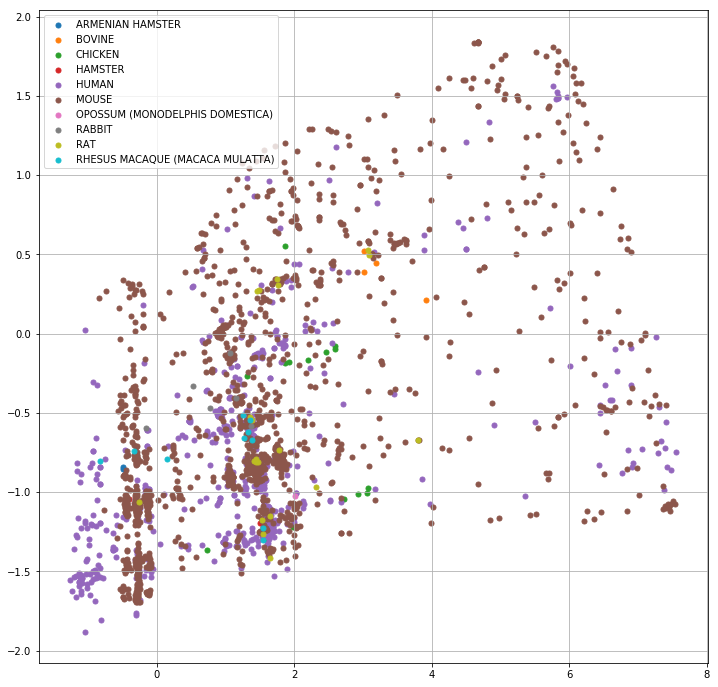

In [12]:
plt.figure(figsize=(12,12))
for x in range(unique_labels.size):
    mask_labels = labels == unique_labels[x]
    plt.scatter(code[mask_labels,0], code[mask_labels,1], marker='.', label=le.classes_[x], s=100)
plt.legend()
plt.grid()

In [13]:
from abpytools import FabCollection, ChainCollection
import pandas as pd

combinations = pd.read_csv('/home/gil/PhD/UCB/precollection/random_pairs.txt', index_col=0, delimiter=', ')

heavy_chains = ChainCollection(path='/home/gil/PhD/UCB/CombinationData/AbFiles/heavy_chains.json')
heavy_chains.load()
light_chains = ChainCollection(path='/home/gil/PhD/UCB/CombinationData/AbFiles/light_chains.json')
light_chains.load()

heavy_chains_list=[]
light_chains_list=[]

for heavy, light in  combinations['Random Pairs'].str.split('-'):
    heavy_chains_list.append(heavy_chains.get_object(heavy))
    light_chains_list.append(light_chains.get_object(light))    
    
fab_collection = FabCollection(None, heavy_chains_list, light_chains_list,
                               names=['P' + str(x) for x in combinations.index.tolist()])

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

VL_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Light'].values]
VH_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Heavy'].values]

VH_data_encoded = encode_sequences(VH_data, VH_LENGTH, DATASETS)
VL_data_encoded = encode_sequences(VL_data, VL_LENGTH, DATASETS)

VH_data_encoded = ss_VH.transform(VH_data_encoded)
VL_data_encoded = ss_VL.transform(VL_data_encoded)

code_1 = encoder.predict([VL_data_encoded, VH_data_encoded])

latent_data = pd.DataFrame(code_1, columns=['Latent1', 'Latent2'], index=fab_collection.names)

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data.dropna(axis=0, inplace=True, subset=[data.columns[0]])

data = data.join(latent_data)

data.head()

Loading in antibody objects


/home/gil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list


,Tm D - Mean,Tm D - Std. Error,Tm2 - Mean,Tm2 - Std. Error,Latent1,Latent2
P2,64.473820,0.000000,NaN,NaN,-0.209911,-1.195081
P3,73.982970,0.130358,NaN,NaN,-0.270600,-1.572971
P4,64.326010,0.060344,NaN,NaN,-0.890855,-0.789461
P6,74.192370,0.036953,NaN,NaN,1.621871,-0.557147
P9,72.899025,0.085337,NaN,NaN,0.946166,-0.595408


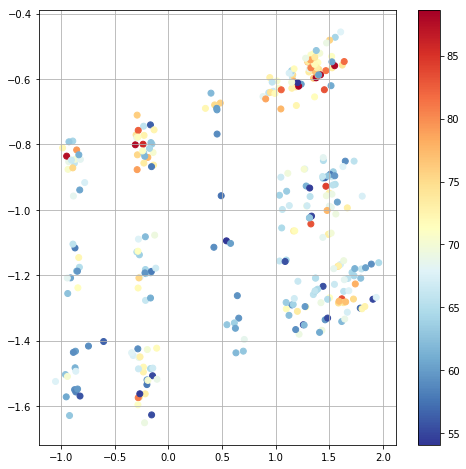

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
plt.colorbar()
plt.grid()

In [15]:
from sklearn.cluster import KMeans

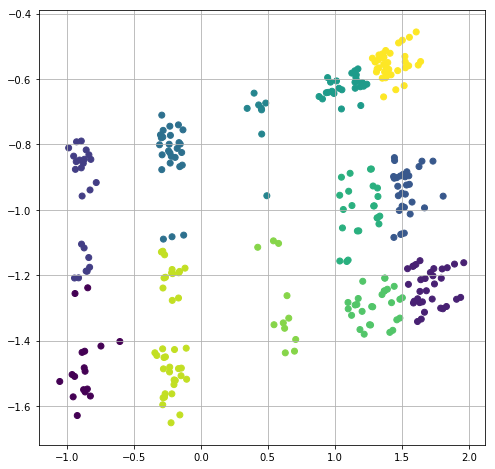

In [16]:
N_CLUSTERS = 12

kmeans = KMeans(N_CLUSTERS, init='random', random_state=2)
kmeans.fit(data[['Latent1','Latent2']])
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=kmeans.predict(data[['Latent1','Latent2']]))
plt.grid()

DEBUG:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/gil/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


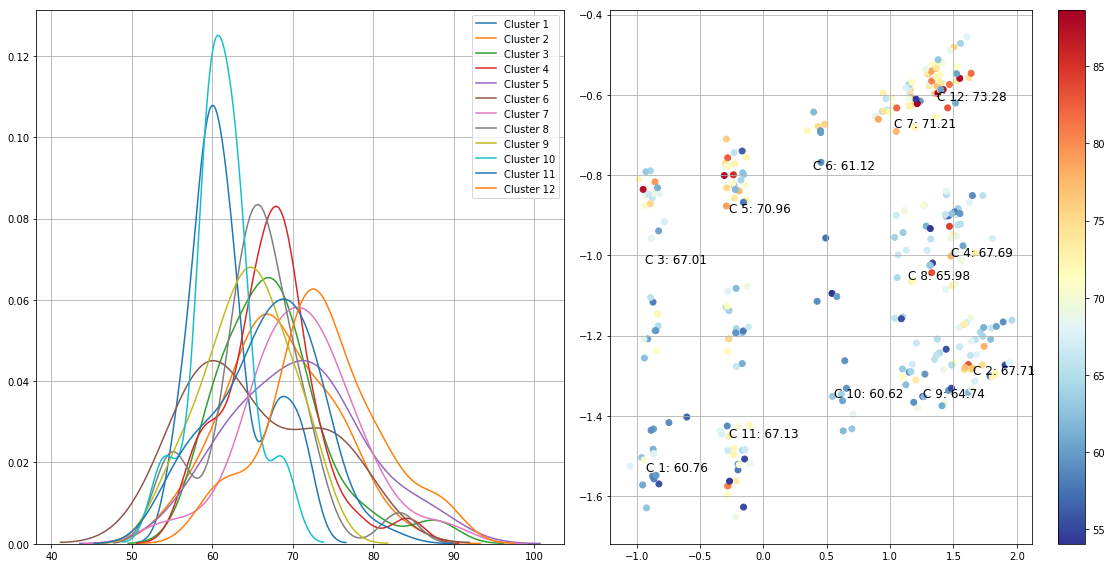

In [17]:
f, ax = plt.subplots(1,2,figsize=(16,8))
kmeans_labels = kmeans.predict(data[['Latent1','Latent2']]) 
tms = ax[1].scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
for x in range(N_CLUSTERS):
    ax[1].text(kmeans.cluster_centers_[x][0]-.05, kmeans.cluster_centers_[x][1]-.06,
               'C {}: {:.2f}'.format(x+1, np.median(data.values[kmeans_labels==x, 0])), fontsize=12)
cbar = f.colorbar(tms)
ax[1].grid()
for x in range(N_CLUSTERS):
    sns.distplot(data.values[kmeans_labels==x, 0], ax=ax[0], hist=False, label='Cluster {}'.format(x+1))
ax[0].legend()
ax[0].grid()
#     print(data.values[kmeans_labels==x, 0].mean(), data.values[kmeans_labels==x, 0].std())
plt.tight_layout()

In [51]:
lambda_kappa = fab_collection.germline['Light']['Assignment'].apply(lambda x: 1 if x.startswith('IGL') else 0).values
lambda_kappa = lambda_kappa[[fab_collection.names.index(name) for name in data.index]]

In [47]:
heavy_germline = fab_collection.germline['Heavy']['Assignment'].apply(lambda x: int(x.split('-')[0][-1])).values
heavy_germline = heavy_germline[[fab_collection.names.index(name) for name in data.index]]

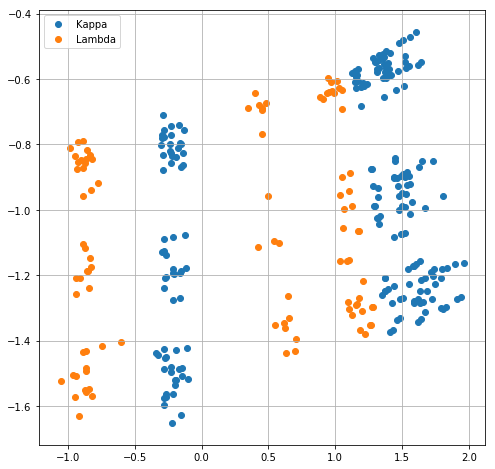

In [54]:
plt.sub(figsize=(16,8))
for x in range(2):
    mask_labels = lambda_kappa == x
    if x == 0:
        label = 'Kappa'
    else:
        label = 'Lambda'
    plt.scatter(data['Latent1'].values[mask_labels], data['Latent2'].values[mask_labels], 
                label=label)
plt.legend()
plt.grid()

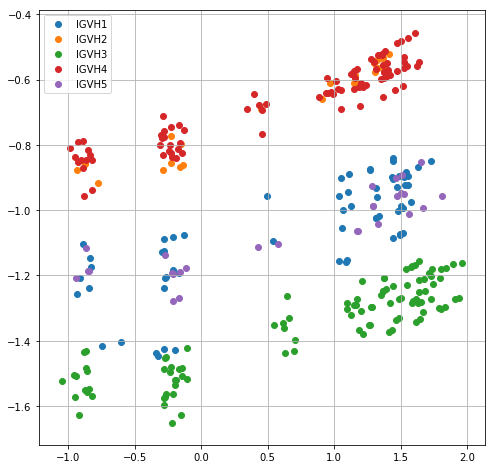

In [55]:
plt.figure(figsize=(8,8))
for x in np.unique(heavy_germline):
    mask_labels = heavy_germline == x
    plt.scatter(data['Latent1'].values[mask_labels], data['Latent2'].values[mask_labels], 
                label='IGVH{}'.format(x))
plt.legend()
plt.grid()